# Random Imputation – Numerical & Categorical Data

## Definition
Random Imputation is a missing value handling technique in which missing values are replaced by randomly selected values from the non-missing observations of the same feature.

## Purpose
To preserve the original data distribution and variance while handling missing values.

---

## Random Imputation for Numerical Data

### How It Works
Missing numerical values are replaced by randomly sampled observed numerical values from the same column.

### Example

**Before**
| Age |
|-----|
| 25 |
| NaN |
| 40 |
| NaN |

**After**
| Age |
|-----|
| 25 |
| 40 |
| 40 |
| 25 |

### Advantages
- Preserves variance
- Maintains data distribution
- Less biased than mean/median

### Disadvantages
- Adds randomness
- Not reproducible without seed
- Not ideal for small datasets

---

## Random Imputation for Categorical Data

### How It Works
Missing categorical values are replaced by randomly sampled existing categories from the same column.

### Example

**Before**
| City |
|------|
| Delhi |
| NaN |
| Mumbai |
| NaN |

**After**
| City |
|------|
| Delhi |
| Mumbai |
| Delhi |
| Mumbai |

### Advantages
- Preserves category frequency
- Better than mode for large missing data
- Maintains variability

### Disadvantages
- Introduces noise
- Results vary
- Not suitable for small datasets

---

## Comparison with Other Methods

| Method | Bias | Variance | Distribution |
|------|-----|----------|-------------|
Mean/Median | High | Reduced | Distorted |
Mode | High | Reduced | Distorted |
Random | Low | Preserved | Preserved |

---

## Key Exam Points
- Random imputation preserves variance and distribution.
- Suitable for large datasets with MCAR missingness.
- Introduces randomness and noise.


- __It learn from the data and after it , it give he rando data for it__
- __Isse graph or veriant me koi bhi frk nhi pdega__
- __Ye jyda memory lega bc train data ko bhi server rkhna pdega__

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Krishnaraj singh\Code\newml\Documents!.0\train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
print(df['Age'].isnull().mean()*100)

19.865319865319865


In [5]:
print(df['Survived'].isnull().mean()*100)

0.0


In [6]:
df['Survived'].isnull().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

__Now train the data__

In [8]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train['Age_impute'] = x_train['Age']
x_test['Age_impute'] = x_test['Age']

In [11]:
x_train

,Age,Fare,Age_impute
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [12]:
# Ye vo values mil jayegi jo null hai 
x_train['Age_impute'][x_train['Age_impute'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_impute, Length: 148, dtype: float64

In [13]:
# Missing values ko replace krenge
# ye vo values aa gai jo ex xhnage krni h
 

x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([57.  , 32.  , 24.  ,  4.  , 22.  ,  5.  , 50.  , 36.  , 19.  ,
       40.  ,  7.  , 33.  , 36.  , 31.  , 24.  , 23.  ,  7.  ,  0.83,
       27.  , 59.  ,  9.  ,  6.  , 21.  , 35.  , 26.  , 29.  , 14.  ,
       27.  , 31.  , 32.5 , 32.  , 20.  , 51.  , 15.  , 16.  , 28.  ,
       65.  , 35.  , 22.  , 45.  , 27.  , 30.  , 22.  , 21.  , 56.  ,
       20.  ,  8.  , 25.  , 45.  , 43.  , 17.  , 11.  , 26.  , 25.  ,
       34.  , 29.  , 31.  , 24.  , 52.  , 25.  , 30.  , 20.  , 22.  ,
       30.  , 61.  , 31.  , 54.  , 21.  , 47.  , 31.  , 24.  , 28.  ,
        2.  , 27.  , 11.  , 37.  , 34.  , 20.  ,  2.  , 48.  , 24.  ,
       48.  , 61.  , 22.  , 33.  , 22.  , 21.  , 23.  , 36.  , 36.  ,
       40.  ,  9.  ,  4.  , 24.  , 41.  , 28.  , 18.  , 18.  , 35.  ,
       24.  , 25.  , 27.  , 65.  , 21.  , 30.  ,  2.  , 26.  , 43.  ,
        0.75, 28.  , 18.  , 58.  , 28.  ,  3.  ,  1.  , 44.  , 16.  ,
       19.  , 10.  , 47.  , 31.  , 32.  , 24.  , 45.5 , 35.  , 59.  ,
       16.  , 26.  ,

In [14]:
x_train['Age_impute'][x_train['Age_impute'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17944\2487395959.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_impute'][x_train['Age_impute'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [15]:
x_train['Age_impute'].isnull().sum()

np.int64(0)

In [16]:
x_test['Age_impute'][x_test['Age_impute'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17944\1771365897.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Age_impute'][x_test['Age_impute'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [17]:
print(x_train)
print(x_test)

      Age      Fare  Age_impute
30   40.0   27.7208        40.0
10    4.0   16.7000         4.0
873  47.0    9.0000        47.0
182   9.0   31.3875         9.0
876  20.0    9.8458        20.0
..    ...       ...         ...
534  30.0    8.6625        30.0
584   NaN    8.7125        25.0
493  71.0   49.5042        71.0
527   NaN  221.7792        40.0
168   NaN   25.9250        62.0

[712 rows x 3 columns]
      Age     Fare  Age_impute
707  42.0  26.2875        42.0
37   21.0   8.0500        21.0
615  24.0  65.0000        24.0
169  28.0  56.4958        28.0
68   17.0   7.9250        17.0
..    ...      ...         ...
89   24.0   8.0500        24.0
80   22.0   9.0000        22.0
846   NaN  69.5500        39.0
870  26.0   7.8958        26.0
251  29.0  10.4625        29.0

[179 rows x 3 columns]


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

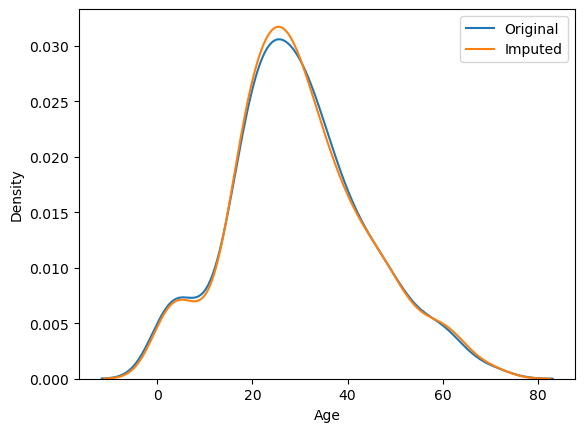

In [19]:
sns.kdeplot(x=x_train['Age'],label='Original')
sns.kdeplot(x=x_train['Age_impute'],label='Imputed')

plt.legend()
plt.show()

__Find the variance between the age and imputed age__

In [20]:
print('original variable variance - ',x_train['Age'].var())
print('original variable variance - ',x_train['Age_impute'].var())

original variable variance -  204.3495133904614
original variable variance -  203.90409761670531


__Relations__

In [21]:
x_train[['Fare','Age','Age_impute']].cov()

,Fare,Age,Age_impute
Fare,2368.246832,71.512440,61.708453
Age,71.512440,204.349513,204.349513
Age_impute,61.708453,204.349513,203.904098


<Axes: >

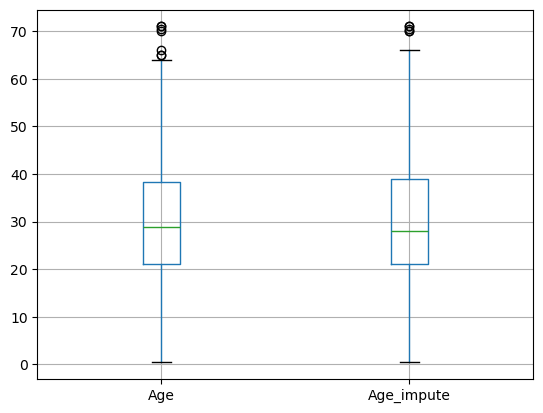

In [22]:
x_train[['Age','Age_impute']].boxplot()

__Har bar random values same honi chahiye because agr maine Fair same hai to age ka random values bhhi same aaana chaiye__

In [23]:
# sample_values = x_train['Age'].dropna().sample(
#     1,
#     random_state=int(observation['Fare'])
# )

## __Now Categorical data__

In [24]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [25]:
data

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [26]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:
x = data
y = data['SalePrice']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']



In [30]:
x_train.sample(6)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
981,TA,TA,336000,TA,TA
206,TA,TA,143900,TA,TA
1202,Fa,TA,117000,TA,Fa
913,NaN,TA,145000,TA,NaN
113,Gd,TA,217000,TA,Gd
1348,Fa,TA,215000,TA,Fa


In [31]:
# ye vo sare rows se jinme only null h
x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] 

863     NaN
1091    NaN
590     NaN
1446    NaN
453     NaN
       ... 
725     NaN
587     NaN
607     NaN
1287    NaN
1192    NaN
Name: FireplaceQu_imputed, Length: 557, dtype: object

In [32]:
x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values

array(['TA', 'TA', 'Gd', 'Gd', 'TA', 'Fa', 'Gd', 'Gd', 'Gd', 'Gd', 'Po',
       'Gd', 'TA', 'TA', 'TA', 'Ex', 'Gd', 'Gd', 'Gd', 'Gd', 'TA', 'TA',
       'TA', 'TA', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'Ex', 'TA',
       'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'TA', 'TA', 'TA', 'Gd',
       'TA', 'Gd', 'Gd', 'Gd', 'Fa', 'Gd', 'TA', 'TA', 'TA', 'TA', 'TA',
       'Gd', 'Gd', 'Gd', 'Fa', 'Gd', 'Gd', 'Gd', 'Gd', 'TA', 'TA', 'Gd',
       'TA', 'TA', 'Gd', 'Ex', 'Gd', 'TA', 'TA', 'Gd', 'TA', 'Gd', 'Po',
       'TA', 'TA', 'Po', 'TA', 'Gd', 'TA', 'TA', 'Gd', 'TA', 'Gd', 'TA',
       'Gd', 'TA', 'Gd', 'TA', 'TA', 'TA', 'Gd', 'Gd', 'TA', 'Gd', 'Gd',
       'TA', 'TA', 'TA', 'Gd', 'TA', 'Ex', 'Gd', 'TA', 'TA', 'Po', 'Fa',
       'TA', 'Gd', 'Gd', 'Ex', 'Gd', 'TA', 'Gd', 'TA', 'TA', 'Gd', 'Gd',
       'TA', 'Gd', 'TA', 'Gd', 'TA', 'TA', 'TA', 'Gd', 'TA', 'Fa', 'TA',
       'Gd', 'Fa', 'Gd', 'TA', 'Gd', 'Fa', 'Gd', 'Gd', 'Gd', 'TA', 'TA',
       'TA', 'Gd', 'Gd', 'TA', 'Gd', 'TA', 'TA', 'G

In [33]:
x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17944\739197782.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['Firepl

In [34]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17944\3615652884.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQu

In [35]:
x_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,TA
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [36]:
x_train.sample(10)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1343,TA,Fa,177000,Fa,TA
1106,TA,TA,179900,TA,TA
955,NaN,TA,145000,TA,Gd
1257,NaN,NaN,99900,TA,TA
1340,NaN,TA,123000,TA,TA
74,NaN,TA,107400,TA,TA
40,TA,TA,160000,TA,TA
1426,TA,TA,271000,TA,TA
152,Gd,TA,190000,TA,Gd
5,NaN,TA,143000,TA,TA


__Ab hm dekhenge ki change krne k bad kitna frk pda h__

In [37]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts(normalize=True),
        x_train['GarageQual_imputed'].value_counts(normalize=True)
    ],
    axis=1
)

temp.columns = ['Original', 'Imputed']


In [38]:
temp

,Original,Imputed
TA,0.951043,0.951199
Fa,0.037171,0.035959
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [39]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts()/len(x_train),
    ],
    axis=1
)
temp.columns = ['Original','Imputed']

In [40]:
temp

,Original,Imputed
TA,0.951043,0.951199
Fa,0.037171,0.035959
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [41]:
x_train['GarageQual'].value_counts()

len(x_train['GarageQual'].dropna())
x_train['GarageQual'].value_counts(dropna = False)
# x_train['GarageQual'].isnull().sum()
# data.shape
len(x_train['GarageQual'])

1168

In [42]:
temp

,Original,Imputed
TA,0.951043,0.951199
Fa,0.037171,0.035959
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [43]:
temp11 = pd.concat(
    [
        x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts()/len(x_train),
    ],
    axis=1
)
temp11.columns = ['Original','Imputed']

In [44]:
temp1 = pd.concat(
    [
        x_train['FireplaceQu'].value_counts(normalize=True),
        x_train['FireplaceQu_imputed'].value_counts(normalize=True)
    ],
    axis=1
)

temp1.columns = ['Original', 'Imputed']


In [45]:
temp1

,Original,Imputed
Gd,0.494272,0.492295
TA,0.412439,0.411815
Fa,0.040917,0.041952
Po,0.027823,0.029110
Ex,0.024550,0.024829


In [46]:
temp11

,Original,Imputed
Gd,0.494272,0.492295
TA,0.412439,0.411815
Fa,0.040917,0.041952
Po,0.027823,0.029110
Ex,0.024550,0.024829


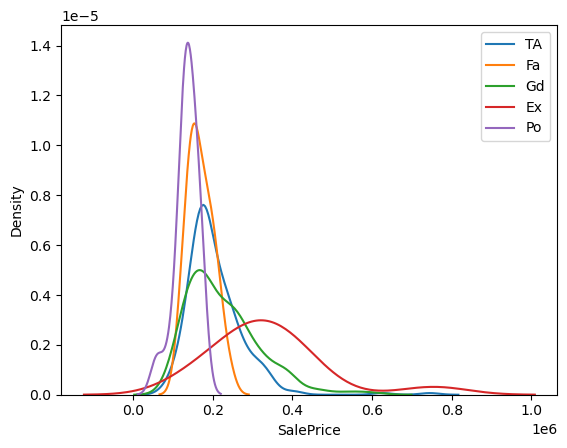

In [47]:
for cat in x_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu']==cat]['SalePrice'],label = cat)
plt.legend()
plt.show()


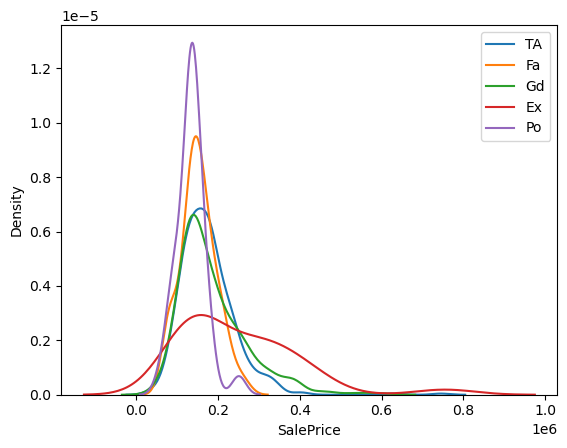

In [48]:
for cat in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu_imputed']==cat]['SalePrice'],label = cat)
plt.legend()
plt.show()
